In [0]:
!pip3 install torch torchvision

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [0]:
transform = transforms.Compose([transforms.Resize((28,28)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))
                               ])
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
validation_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 100, shuffle=False)

In [0]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

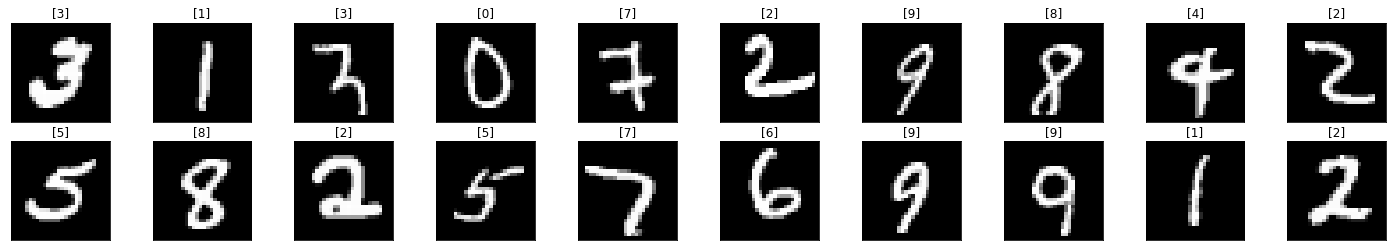

In [0]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])

In [0]:
class Classifier(nn.Module):
    
    def __init__(self, D_in, H1, H2, H3, D_out):
        super().__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear1_2 = nn.Linear(H1, H2)
        self.linear2 = nn.Linear(H2, H3)
        self.linear3 = nn.Linear(H3, D_out)
    def forward(self, x):
        x = F.relu(self.linear1(x)) 
        x = F.relu(self.linear1_2(x)) 
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [0]:
model = Classifier(784, 1024, 512, 128, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=1024, bias=True)
  (linear1_2): Linear(in_features=1024, out_features=512, bias=True)
  (linear2): Linear(in_features=512, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=10, bias=True)
)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [0]:
epochs = 15
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.view(val_inputs.shape[0], -1)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/ len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

epoch : 1
training loss: 0.5411, acc 84.9233 
validation loss: 0.2728, validation acc 91.7200 
epoch : 2
training loss: 0.2419, acc 92.7367 
validation loss: 0.1919, validation acc 94.1700 
epoch : 3
training loss: 0.1775, acc 94.8017 
validation loss: 0.1554, validation acc 95.2900 
epoch : 4
training loss: 0.1373, acc 95.9500 
validation loss: 0.1221, validation acc 96.2100 
epoch : 5
training loss: 0.1122, acc 96.6333 
validation loss: 0.1115, validation acc 96.5200 
epoch : 6
training loss: 0.0936, acc 97.1733 
validation loss: 0.0943, validation acc 97.0000 
epoch : 7
training loss: 0.0781, acc 97.6850 
validation loss: 0.0853, validation acc 97.3100 
epoch : 8
training loss: 0.0668, acc 97.9483 
validation loss: 0.0805, validation acc 97.4100 
epoch : 9
training loss: 0.0582, acc 98.2650 
validation loss: 0.0731, validation acc 97.6400 
epoch : 10
training loss: 0.0496, acc 98.5100 
validation loss: 0.0748, validation acc 97.8700 
epoch : 11
training loss: 0.0434, acc 98.6817 
va

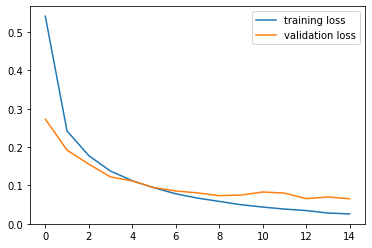

In [0]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

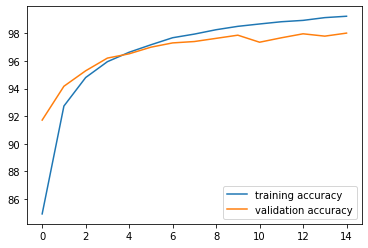

In [0]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()